In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import numpy as np

!pwd

from utils.utils import show_mask_image
import matplotlib.pyplot as plt

from data.ddsm_dataset import get_train_dataloader

split_csv = '../resources/ddsm/ddsm_nikulin_partitions/train_filenames.txt'


ddsm_annotations = '../resources/ddsm/ddsm_annotations_16bits_1152_896.json.gz'
root_dir = '/home/alalbiol/Data/mamo/DDSM_png_16bit_1152x896'
transform_generator = None
patch_size = 224
convert_to_rgb = False
include_normals = False
normalize_input = True

/home/alalbiol/Programacion/Mammography/mamo_holistic/notebooks


In [3]:
train_dl = get_train_dataloader(split_csv, ddsm_annotations, root_dir, patch_size, batch_size=32, 
                        convert_to_rgb = convert_to_rgb, shuffle=True, num_workers=4, return_mask=True, 
                        subset_size=None, include_normals=include_normals,
                        normalize_input = True)

Number of annotations:  4664
Number of annotations after filtering split:  3263
Not including normal images
Number of annotations after filtering OTHER_BENIGN (18 in total)  3263


In [4]:
# count instances per class
from collections import Counter

batch = next(iter(train_dl))
Counter(batch[1].numpy())


Counter({0: 32, 4: 10, 3: 8, 2: 7, 1: 7})

In [5]:

from utils.utils import show_mask_image


def show_batch(batch):
    labels = batch[1].numpy()
    background_idx = np.where(labels == 0)[0]
    benign_mass_idx = np.where(labels == 1)[0]
    benign_calc_idx = np.where(labels == 2)[0]
    malig_mass_idx = np.where(labels == 3)[0]
    malig_calc_idx = np.where(labels == 4)[0]

    num_rows = 2
    fig, axs = plt.subplots(num_rows, 5, figsize=(20, 5))

    for row in range(num_rows):
        if row < len(background_idx):
            k = background_idx[row]
            image = batch[0][k].numpy()[0]
            mask = batch[2][k].numpy()
        else:
            image = np.zeros((224, 224))
            mask = np.zeros((224, 224))
            mask[60:120,60:120]=1
            
        show_mask_image(image, mask, ax=axs[row, 0], title='background')
        
        if row < len(benign_mass_idx):
            k = benign_mass_idx[row]
            image = batch[0][k].numpy()[0]
            mask = batch[2][k].numpy()
        else:
            image = np.zeros((224, 224))
            mask = np.zeros((224, 224))
            mask[60:120,60:120]=1
        
        show_mask_image(image, mask, ax=axs[row, 1], title='benign_mass')
        
        if row < len(benign_calc_idx):
            k = benign_calc_idx[row]
            image = batch[0][k].numpy()[0]
            mask = batch[2][k].numpy()
        else:
            image = np.zeros((224, 224))
            mask = np.zeros((224, 224))
            mask[60:120,60:120]=1
            
        show_mask_image(image, mask, ax=axs[row, 2], title='benign_calc')
        
        if row < len(malig_mass_idx):
            k = malig_mass_idx[row]
            image = batch[0][k].numpy()[0]
            mask = batch[2][k].numpy()
        else:
            image = np.zeros((224, 224))
            mask = np.zeros((224, 224))
            mask[60:120,60:120]=1
            
        show_mask_image(image, mask, ax=axs[row, 3], title='malig_mass')
        
        if row < len(malig_calc_idx):
            k = malig_calc_idx[row]
            image = batch[0][k].numpy()[0]
            mask = batch[2][k].numpy()
        else:
            image = np.zeros((224, 224))
            mask = np.zeros((224, 224))
            mask[60:120,60:120]=1
            
        show_mask_image(image, mask, ax=axs[row, 4], title='malig_calc')
        
        fig.suptitle("mean = {:.2f}, std = {:.2f}".format(batch[0].mean(), batch[0].std()))
            
        


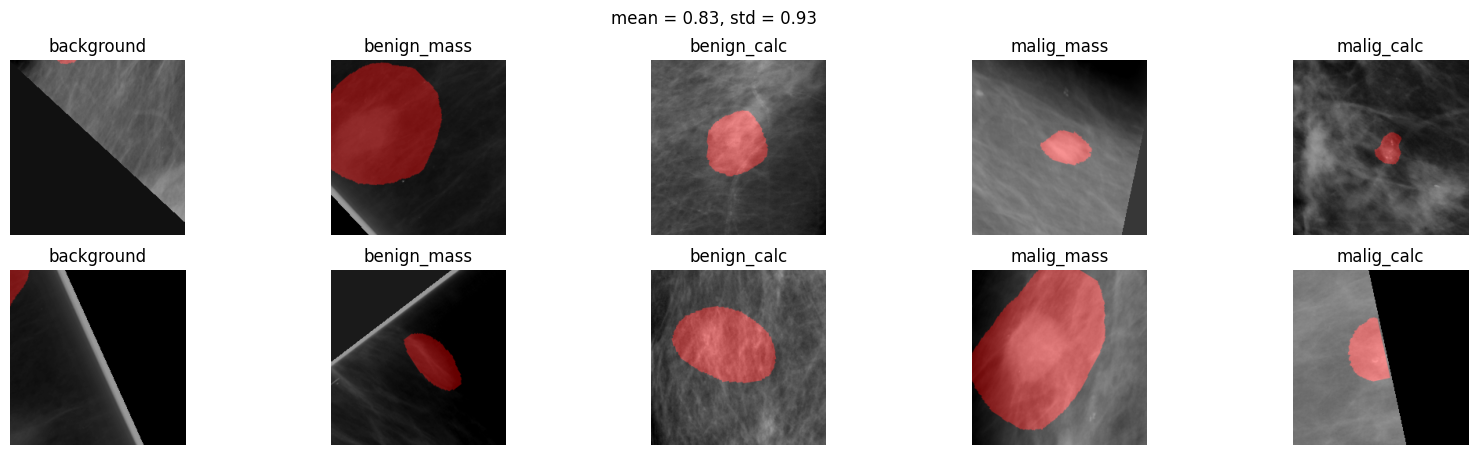

In [6]:
batch = next(iter(train_dl))
show_batch(batch)

In [7]:
from data.ddsm_dataset import get_test_dataloader

patch_size=  224
convert_to_rgb = False
split_csv=  'resources/ddsm/ddsm_nikulin_partitions/test_filenames.txt'
eval_patches_root = '/home/alalbiol/Data/mamo/eval_patches_16bits_224_test_nikulin'
batch_size: 32
num_workers: 16


test_dl = get_test_dataloader(eval_patches_root, batch_size=32, return_mask=True, convert_to_rgb = convert_to_rgb, 
                              subset_size=None, format_img = 'npy')

Number of samples after filtering:  1119


torch.Size([32, 1, 224, 224]) torch.Size([32]) torch.Size([32, 224, 224])
0.8171221613883972, 0.9226683974266052
-1.082098126411438, 4.278564929962158


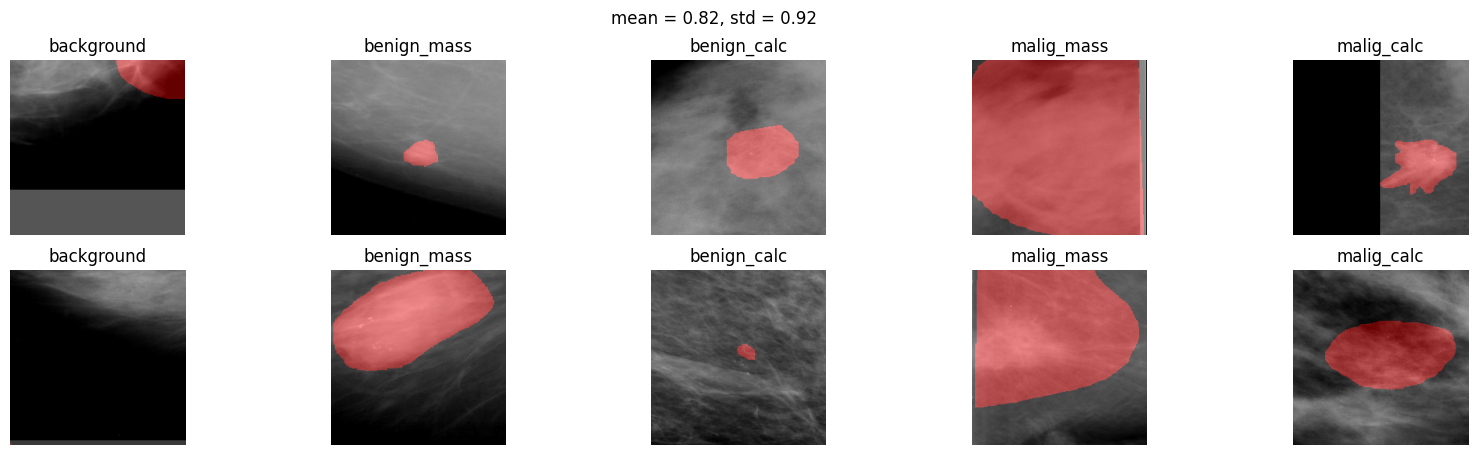

In [15]:
batch = next(iter(test_dl))

print(batch[0].shape, batch[1].shape, batch[2].shape)
print(f"{batch[0].mean()}, {batch[0].std()}")
print(f"{batch[0].min()}, {batch[0].max()}")


show_batch(batch)

# Patch sampler

## Positive patches

In [9]:
from data.ddsm_dataset import PatchSampler, RandomAffineTransform, IdentityTransform

affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler  = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 1, 
                             n_hard_negative_crop=0,
                             n_blob_crops=0,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler,
                             convert_to_rgb=False)

NameError: name 'DDSM_Patch_Dataset' is not defined

[3]


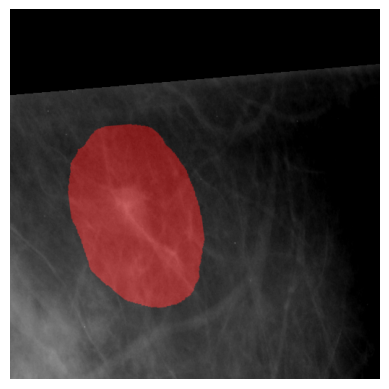

In [ ]:
image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0][0], mask_patches[0])

## Negative patches at blobs


In [ ]:


affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=0,
                             n_blob_crops=1,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559


[0]


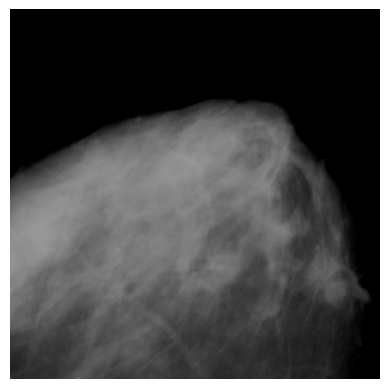

In [ ]:
image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0][0], mask_patches[0])

## Hard negatives

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559
[0]


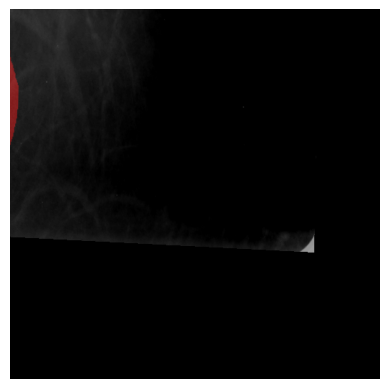

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=1,
                             n_blob_crops=0,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0][0], mask_patches[0])

# Random crops

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559
[0]


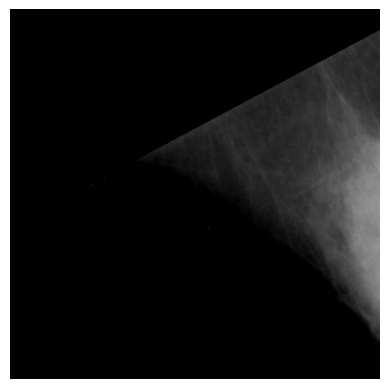

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=0,
                             n_blob_crops=0,
                             n_random_crops=1)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0][0], mask_patches[0])

## Several patches

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559
[3 0 0 0]


dtype('uint8')

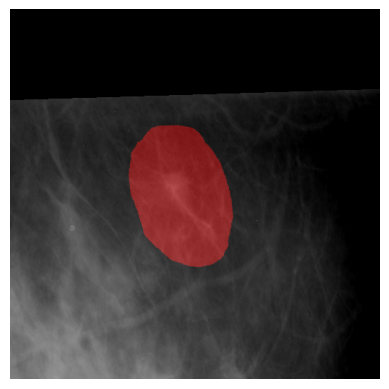

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 1, 
                             n_hard_negative_crop=1,
                             n_blob_crops=1,
                             n_random_crops=1)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0][0], mask_patches[0])

image_patches[0].dtype

# Data loader

In [ ]:
from data.ddsm_dataset import get_train_dataloader


dl = get_train_dataloader(split_csv, ddsm_annotations, root_dir, patch_size= 512, return_mask= True)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559


In [ ]:
# get a batch
for i, batch in enumerate(dl):
    print(batch[0].shape, batch[1].shape, batch[2].shape)
    if i>10:
        break


torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 3, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])


tensor(3)


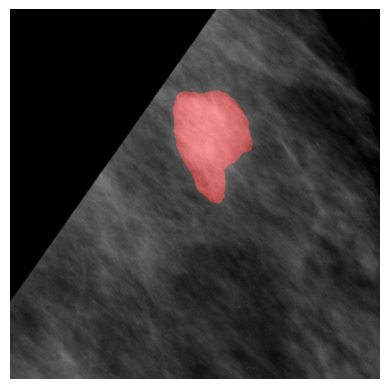

In [ ]:
import torch

k = torch.where(batch[1])[0][0] # selecte patch with positive label
show_mask_image(batch[0][k][0], batch[2][k])
print(batch[1][k])


In [ ]:
dl = get_train_dataloader(split_csv, ddsm_annotations, root_dir, patch_size=512, return_mask= False)

# get a batch
for i, batch in enumerate(dl):
    print(batch[0].shape,  batch[1].shape)
    if i>2:
        break


Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  6577
Number of annotations after filtering OTHER_BENIGN (18 in total)  6559
torch.Size([128, 3, 512, 512]) torch.Size([128])
torch.Size([128, 3, 512, 512]) torch.Size([128])
torch.Size([128, 3, 512, 512]) torch.Size([128])
torch.Size([128, 3, 512, 512]) torch.Size([128])


In [ ]:
print(batch[0][0].dtype)
print(batch[1][0].max())

torch.float32
tensor(3)


# Patch eval dataset 

In [ ]:
from data.ddsm_dataset import DDSM_patch_eval

root_dir = '/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224'

eval_dataset = DDSM_patch_eval(root_dir)

print(len(eval_dataset))

2001


In [ ]:
image, target = eval_dataset[1000]

print(image.shape, target)
print(image.dtype)
print(image.max())

torch.Size([3, 224, 224]) 2
torch.float32
tensor(0.6980)


In [ ]:
targets = np.where(np.array(eval_dataset.targets)==4)
print(eval_dataset.samples[targets[0][0]])


('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/malignant_calc/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 4)


In [ ]:
print(len(eval_dataset.targets))
print(len(eval_dataset.samples))

2001
2001


In [ ]:
samples, targets = zip(*[(sample, target) for sample, target in zip(eval_dataset.samples, eval_dataset.targets) if "_img.png" in sample[0] ] )
samples = list(samples)
targets = list(targets)

print(len(samples))
print(samples[0:10])
print(targets[0:10])

2001
[('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1027_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1032_1.LEFT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1032_1.LEFT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1036_1.LEFT_CC_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1036_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eva

# Image DDSM Dataset

In [ ]:
split_csv = '../resources/ddsm/DDSM_train.csv'
ddsm_annotations = '../resources/ddsm/ddsm_annotations.json.gz'
root_dir = '/home/alalbiol/Data/mamo/DDSM_png_1152x896'
transform = None

from data.ddsm_dataset import DDSM_Image_Dataset

dataset = DDSM_Image_Dataset(split_csv, ddsm_annotations, root_dir, transform)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  5877
Number of annotations after removing repeated:  5297


In [ ]:
print("Number of malignant cases: ", dataset.ddsm_annotations.breast_malignant.sum())
print("Number of  cases: ", len(dataset.ddsm_annotations))


Number of malignant cases:  1562
Number of  cases:  5297


In [ ]:
image, target = dataset[0]

print(np.array(image).shape, target)

(1152, 896) 0


In [ ]:
from torchvision import transforms




transform = transforms.Compose([
    transforms.RandomAffine(degrees=15, shear=10, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.cat([x, x, x], dim=0)),
])

    


dataset = DDSM_Image_Dataset(split_csv, ddsm_annotations,  root_dir, transform=transform, convert_to_rgb=False)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  5877
Number of annotations after removing repeated:  5297


torch.Size([3, 1152, 896])
tensor(1.)


Text(0.5, 1.0, 'cancer = 0')

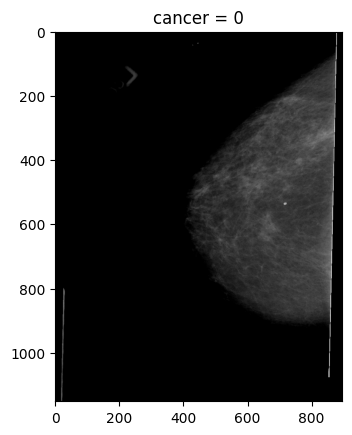

In [ ]:
image, target = dataset[0]

print(image.shape)
print(image.max())

plt.imshow(image[0], cmap='gray')
plt.title(f"cancer = {target}")

## ahora imagen completa y mascara, pero sin transformacion

In [ ]:
dataset = DDSM_Image_Dataset(split_csv, ddsm_annotations,  root_dir, transform=None, convert_to_rgb=False, return_mask=True)
print(len(dataset))


Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  5877
Number of annotations after removing repeated:  5297
5297


(896, 1152)


Text(0.5, 1.0, 'cancer = 0')

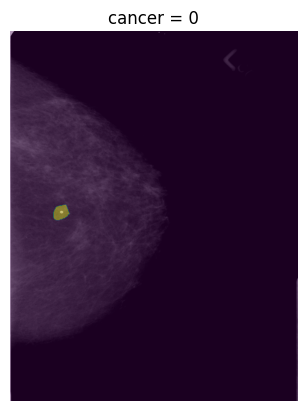

In [ ]:
image, target,mask = dataset[0]

print(image.size)
#print(image.max())
plt.imshow(image, cmap='gray')
plt.imshow(mask, alpha=0.4)
plt.axis('off')
plt.title(f"cancer = {target}")

## Test dataset

In [ ]:
split_csv = '../resources/ddsm/DDSM_test.csv'

dataset = DDSM_Image_Dataset(split_csv, ddsm_annotations,  root_dir, transform=None, convert_to_rgb=False, return_mask=True, num_normal_images_test=700)
print(len(dataset))


Number of annotations:  4664
Number of annotations after filtering split:  667
num normal images test:  200
Including 200 normal images
Number of annotations after adding normals:  867
Number of annotations after removing repeated:  812
812


## Dream pilot dataset

In [ ]:
from data.ddsm_dataset import DreamPilot_Image_Dataset

dream_pilot_folder = '/home/alalbiol/Data/mamo/dream_pilot_png_832x1152'

dataset = DreamPilot_Image_Dataset(dream_pilot_folder=dream_pilot_folder, transform=None)

(832, 1152)
0
(1152, 832)
65535


Text(0.5, 1.0, 'cancer = 0')

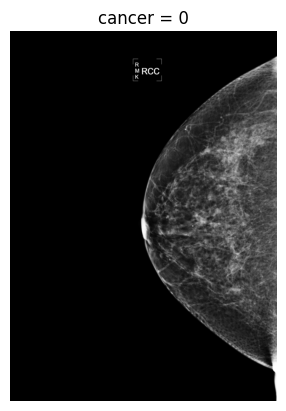

In [ ]:
im, label = dataset[0]

print(im.size)
print(label)

im_arr = np.array(im)
print(im_arr.shape)
print(im_arr.max())


im_arr = im_arr / im_arr.max()
plt.imshow(im_arr, cmap='gray')
plt.axis('off')
plt.title(f"cancer = {label}")

<built-in method size of Tensor object at 0x7f0d70a34530>
0
(1, 1152, 832)
6.26729


Text(0.5, 1.0, 'cancer = 0')

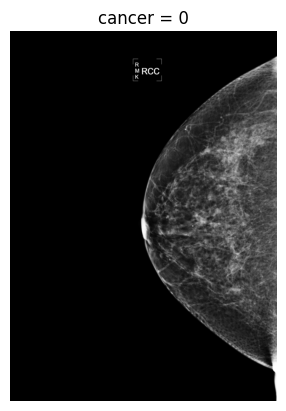

In [ ]:
from torchvision import transforms
from utils.transforms import Standardize

transforms = transforms.Compose([
    transforms.ToTensor(),
    Standardize()
])

dataset = DreamPilot_Image_Dataset(dream_pilot_folder=dream_pilot_folder, transform=transforms)
im, label = dataset[0]

print(im.size)
print(label)

im_arr = np.array(im)
print(im_arr.shape)
print(im_arr.max())


im_arr = im_arr / im_arr.max()
plt.imshow(im_arr[0], cmap='gray')
plt.axis('off')
plt.title(f"cancer = {label}")


In [ ]:
im_arr = np.array(im) 
print(im_arr.max())

im1 = im_arr / 256

im2 = (im_arr - im_arr.mean()) / im_arr.std()
im3 = (im1 - im1.mean()) / im1.std()

print(im_arr.max(), im1.max(), im2.max(), im3.max())


65535
65535 255.99609375 6.267293009692297 6.267293009692297


## Image Datamodule

In [ ]:
from data.ddsm_dataset import DDSMImageDataModule

In [ ]:
from utils.load_config import load_config
config = load_config('../config_files/base_config_image.yaml')


train_datamodule = DDSMImageDataModule(config)

In [ ]:
images, labels = next(iter(train_datamodule.train_dataloader()))
print(images.shape, labels.shape)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Including 2580 normal images
Number of annotations after adding normals:  5877
Number of annotations after removing repeated:  5297


/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 3, 1152, 896]) torch.Size([32])


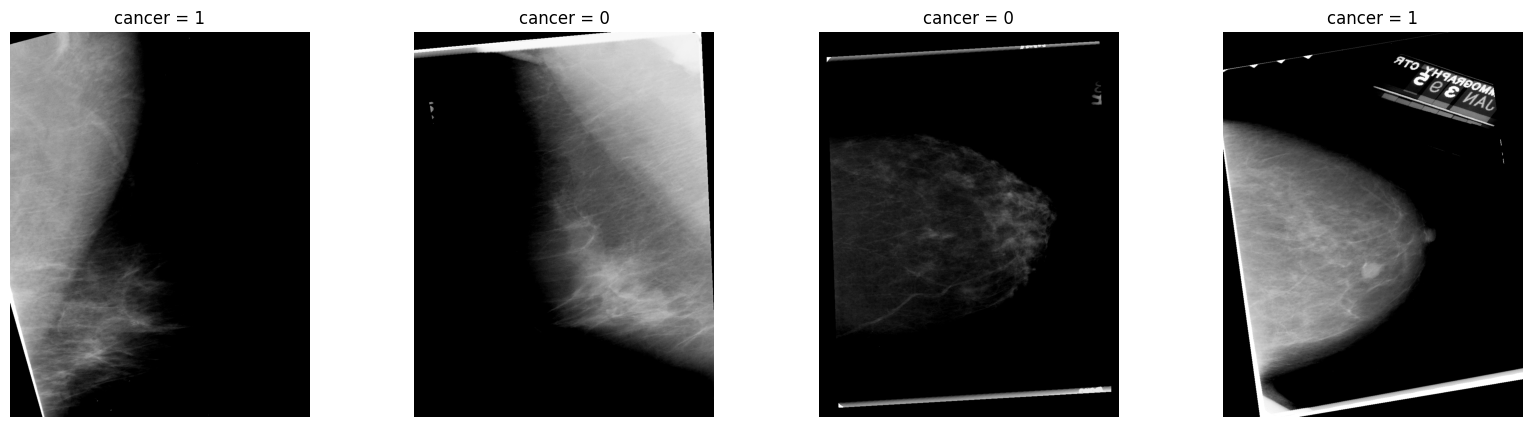

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax[i].imshow(images[i][0], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f"cancer = {labels[i]}")
plt.show()

Number of annotations:  4664
Number of annotations after filtering split:  667
num normal images test:  200
Including 200 normal images
Number of annotations after adding normals:  867
Number of annotations after removing repeated:  812


/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 3, 1152, 896]) torch.Size([32])


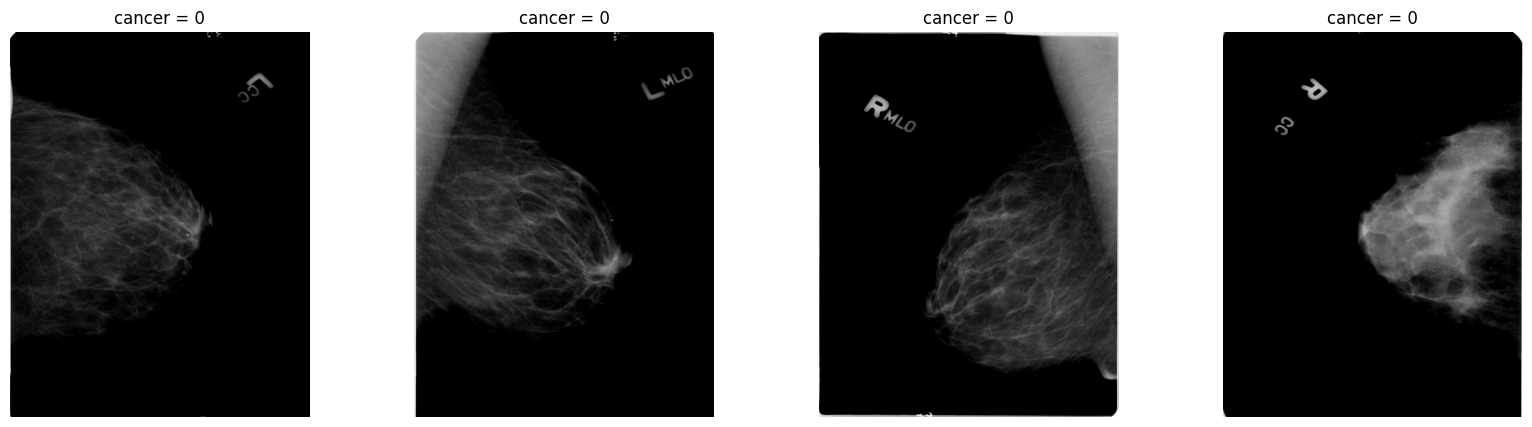

In [ ]:
images, labels = next(iter(train_datamodule.val_dataloader()))
print(images.shape, labels.shape)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax[i].imshow(images[i][0], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f"cancer = {labels[i]}")
plt.show()